# Análise Exploratória de Dados - Pesquisa Stack Overflow*

[*Link Para Dados e Pesquisa](https://insights.stackoverflow.com/survey)

O que veremos:

- Limpeza e Prepação de Dados
- Análise Exploratória (Entendimento parcial)
- Perguntas interessantes (Exercícios)

### CRISP-DM
<img src=https://miro.medium.com/max/988/0*tA5OjppLK627FfFo width="50%" align="center"/>

# Carregando os dados

In [29]:
import os

os.listdir('./developer_survey_2020/')

['survey_results_public.csv',
 '.DS_Store',
 'survey_results_schema copy.csv',
 'country_languages.numbers',
 'country_languages.csv',
 'survey_results_schema.csv',
 '.ipynb_checkpoints',
 'README_2020.txt',
 'so_survey_2020.pdf']

In [1]:
# import data and schema

In [30]:
import pandas as pd
import numpy as np

In [31]:
df_survey_raw = pd.read_csv("./developer_survey_2020/survey_results_public.csv")
df_survey_raw

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [32]:
df_survey_raw.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [33]:
schema_fname = "./developer_survey_2020/survey_results_schema.csv"
schema_raw = pd.read_csv(schema_fname, index_col = "Column").QuestionText
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [34]:
schema_raw["MainBranch"]

'Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."'

# Preparando os dados

O que tentaremos fazer:

- Analise demografica da comunidade global de programação
- Entender a distribuição das habilidade de programação, experiência profissional e preferências
- Informações relacionadas a empregabilidade e opiniões


In [35]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt',
    'ConvertedComp'
]

In [ ]:
# Converter tipos

In [36]:
len(selected_columns)

21

In [37]:
df_survey = df_survey_raw[selected_columns].copy()
df_survey

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,ConvertedComp
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important,NaN
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important,NaN
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,...,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,...,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,NaN
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,...,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,...,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important,NaN
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,...,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
schema = schema_raw[selected_columns]
schema

Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageWorkedWith        Which programming, scripting, and markup langu...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
NEWLearn                  How frequently do you learn a new language or ...
NEWStuck                  What do you do when you get stuck on a problem...
Emplo

In [39]:
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [40]:
pd.to_numeric(df_survey.Age1stCode, errors = "coerce")

0        13.0
1        19.0
2        15.0
3        18.0
4        16.0
         ... 
64456    16.0
64457     NaN
64458     NaN
64459     NaN
64460     NaN
Name: Age1stCode, Length: 64461, dtype: float64

In [41]:
cols = ["Age1stCode", "YearsCode", "YearsCodePro"]
df_survey[cols] = df_survey[cols].apply(pd.to_numeric, errors = "coerce")
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57473 non-null  float64
 7   YearsCode               56784 non-null  float64
 8   YearsCodePro            44133 non-null  float64
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [42]:
df_survey.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs,ConvertedComp
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000,3.475600e+04
mean,30.834111,15.476572,12.782051,8.869667,40.782174,1.037561e+05
std,9.585392,5.114081,9.490657,7.759961,17.816383,2.268853e+05
min,1.000000,5.000000,1.000000,1.000000,1.000000,0.000000e+00
25%,24.000000,12.000000,6.000000,3.000000,40.000000,2.464800e+04
50%,29.000000,15.000000,10.000000,6.000000,40.000000,5.404900e+04
75%,35.000000,18.000000,17.000000,12.000000,44.000000,9.500000e+04
max,279.000000,85.000000,50.000000,50.000000,475.000000,2.000000e+06


In [43]:
df_survey.drop(df_survey[df_survey.Age < 10].index, inplace=True)
df_survey.drop(df_survey[df_survey.Age > 100].index, inplace=True)
df_survey.drop(df_survey[df_survey.WorkWeekHrs > 140].index, inplace=True)

In [44]:
df_survey

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,ConvertedComp
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important,NaN
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important,NaN
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,...,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,...,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,NaN
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,...,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16.0,10.0,NaN,NaN,...,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important,NaN
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,...,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df_survey.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs,ConvertedComp
count,45319.000000,57326.000000,56636.000000,43993.000000,41002.000000,3.462200e+04
mean,30.832322,15.475317,12.783883,8.873003,40.024395,1.037241e+05
std,9.505965,5.114952,9.494519,7.762089,10.630010,2.266702e+05
min,10.000000,5.000000,1.000000,1.000000,1.000000,0.000000e+00
25%,24.000000,12.000000,6.000000,3.000000,40.000000,2.464800e+04
50%,29.000000,15.000000,10.000000,6.000000,40.000000,5.404900e+04
75%,35.000000,18.000000,17.000000,12.000000,43.000000,9.500000e+04
max,99.000000,85.000000,50.000000,50.000000,140.000000,2.000000e+06


In [46]:
df_survey["Gender"].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [47]:
df_survey.Gender

0        Man
1        NaN
2        NaN
3        Man
4        Man
        ... 
64456    NaN
64457    NaN
64458    NaN
64459    NaN
64460    NaN
Name: Gender, Length: 64306, dtype: object

In [48]:
df_survey.where(~(df_survey.Gender.str.contains(";", na= False)),  np.nan, inplace = True)
df_survey

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,ConvertedComp
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important,NaN
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important,NaN
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,...,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,...,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,NaN
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,...,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16.0,10.0,NaN,NaN,...,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important,NaN
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,...,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
pd.get_dummies(df_survey.Gender)

,Man,"Non-binary, genderqueer, or gender non-conforming",Woman
0,1,0,0
1,0,0,0
2,0,0,0
3,1,0,0
4,1,0,0
...,...,...,...
64456,0,0,0
64457,0,0,0
64458,0,0,0
64459,0,0,0


# Análise Exploratória

Importante para entender [viés de seleção](https://en.wikipedia.org/wiki/Selection_bias) da amostra coletada.

- Importante para reportar resultados com o disclaimer que os dados representam apenas aquela população em específico.

In [60]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### País

In [51]:
schema.Country

'Where do you live?'

In [54]:
df_survey.Country.nunique()

183

In [56]:
top_countries = df_survey.Country.value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

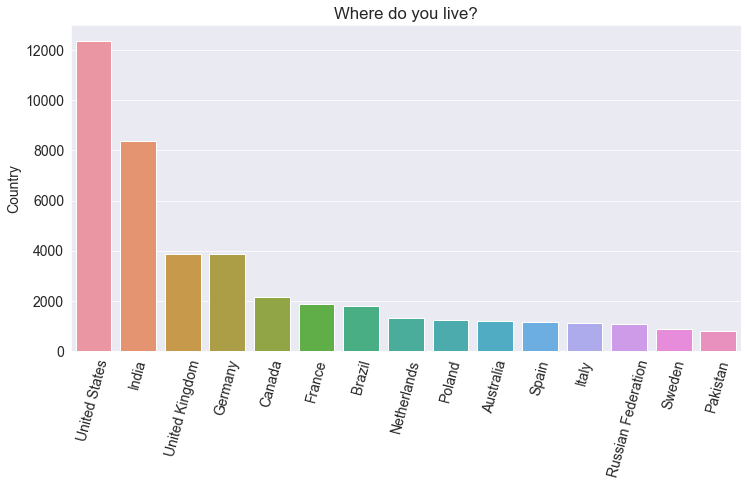

In [39]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries);

In [ ]:
#Languages

In [58]:
country_languages = pd.read_csv("./developer_survey_2020/country_languages.csv")
country_languages

,Country,Languages Spoken
0,Afghanistan,"Dari Persian, Pashtu (both official), other Tu..."
1,Albania,"Albanian (Tosk is the official dialect), Greek"
2,Algeria,"Arabic (official), French, Berber dialects"
3,Andorra,"Catalán (official), French, Castilian, Portuguese"
4,Angola,"Portuguese (official), Bantu and other African..."
...,...,...
193,Vietnam,Vietnamese (official); English (increasingly f...
194,Western Sahara (proposed state),"Hassaniya Arabic, Moroccan Arabic"
195,Yemen,Arabic
196,Zambia,"English (official); major vernaculars: Bemba, ..."


In [61]:
df_survey.columns

Index(['Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor', 'Hobbyist',
       'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck', 'Employment',
       'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime',
       'NEWEdImpt', 'ConvertedComp'],
      dtype='object')

In [62]:
df_spoken_languages = df_survey.merge(country_languages, on = "Country",how = "left")
df_spoken_languages

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,ConvertedComp,Languages Spoken
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,...,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important,NaN,German
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,...,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important,NaN,"English, Welsh, Scots Gaelic"
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,...,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,NaN,"Albanian (Tosk is the official dialect), Greek"
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,...,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important,NaN,"English 82%, Spanish 11% (2000)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64301,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16.0,10.0,NaN,NaN,...,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important,NaN,"English 82%, Spanish 11% (2000)"
64302,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,...,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Arabic (official), Berber dialects, French oft..."
64303,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64304,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,...,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Polish 98% (2002)


In [76]:
df_spoken_languages["is_english_official"] = df_spoken_languages["Languages Spoken"].str.contains("English", na = False)
df_spoken_languages

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,ConvertedComp,Languages Spoken,is_english_official
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important,NaN,German,False
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important,NaN,"English, Welsh, Scots Gaelic",True
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,...,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,NaN,"Albanian (Tosk is the official dialect), Greek",False
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important,NaN,"English 82%, Spanish 11% (2000)",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64301,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16.0,10.0,NaN,NaN,...,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important,NaN,"English 82%, Spanish 11% (2000)",True
64302,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,...,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Arabic (official), Berber dialects, French oft...",False
64303,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
64304,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,...,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Polish 98% (2002),False


In [77]:
df_spoken_languages[df_spoken_languages["is_english_official"] == True]

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,ConvertedComp,Languages Spoken,is_english_official
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important,NaN,"English, Welsh, Scots Gaelic",True
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important,NaN,"English 82%, Spanish 11% (2000)",True
6,India,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,6.0,4.0,C#;HTML/CSS;PHP,...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",NaN,Very satisfied,NaN,Sometimes: 1-2 days per month but less than we...,Very important,NaN,"Hindi 30%, English, Bengali, Gujarati, Kashmir...",True
7,United States,36.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,12.0,17.0,13.0,Python;SQL,...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",39.0,Slightly dissatisfied,Remote work options;Opportunities for professi...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,116000.0,"English 82%, Spanish 11% (2000)",True
9,United Kingdom,22.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Mathematics or statistics,Yes,14.0,8.0,4.0,HTML/CSS;Java;JavaScript;Python;SQL,...,Employed full-time,"Database administrator;Developer, full-stack;D...",36.0,Very satisfied,Flex time or a flexible schedule;How widely us...,Often: 1-2 days per week or more,Fairly important,32315.0,"English, Welsh, Scots Gaelic",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64292,Bangladesh,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",Yes,16.0,6.0,3.0,C#;HTML/CSS;Java;JavaScript;Swift,...,"Independent contractor, freelancer, or self-em...","Developer, back-end",NaN,NaN,NaN,NaN,Somewhat important,NaN,"Bangla (official), English",True
64293,Nepal,NaN,NaN,"Secondary school (e.g. American high school, G...",NaN,Yes,17.0,3.0,NaN,NaN,...,"Not employed, but looking for work","Developer, back-end;Developer, desktop or ente...",NaN,NaN,NaN,NaN,Not at all important/not necessary,NaN,"Nepali 48% (official), Maithali 12%, Bhojpuri ...",True
64297,India,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,...,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Hindi 30%, English, Bengali, Gujarati, Kashmir...",True
64298,Thailand,NaN,NaN,Primary/elementary school,NaN,Yes,5.0,3.0,NaN,C++;HTML/CSS,...,"Not employed, but looking for work","Data or business analyst;Developer, mobile;Sen...",NaN,NaN,NaN,NaN,Very important,NaN,"Thai (Siamese), English (secondary language of...",True


In [82]:
df_spoken_languages[~df_spoken_languages.Country.isna()].is_english_official.value_counts(normalize = True)

True     0.607568
False    0.392432
Name: is_english_official, dtype: float64

In [79]:
df_spoken_languages[df_spoken_languages.Country == "India"]

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,ConvertedComp,Languages Spoken,is_english_official
6,India,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,6.0,4.0,C#;HTML/CSS;PHP,...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",NaN,Very satisfied,NaN,Sometimes: 1-2 days per month but less than we...,Very important,NaN,"Hindi 30%, English, Bengali, Gujarati, Kashmir...",True
21,India,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,10.0,2.0,Java;Python,...,Employed full-time,"Developer, full-stack;Engineer, data",50.0,Slightly dissatisfied,NaN,Often: 1-2 days per week or more,Very important,NaN,"Hindi 30%, English, Bengali, Gujarati, Kashmir...",True
57,India,NaN,NaN,NaN,Web development or web design,Yes,22.0,NaN,NaN,C#;JavaScript;SQL;TypeScript,...,"Independent contractor, freelancer, or self-em...","Developer, back-end",NaN,Very satisfied,Family friendliness,Often: 1-2 days per week or more,Very important,NaN,"Hindi 30%, English, Bengali, Gujarati, Kashmir...",True
62,India,21.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,17.0,4.0,NaN,C;C++;HTML/CSS;Java;JavaScript;Python,...,"Not employed, but looking for work","Designer;Developer, back-end;Developer, front-...",NaN,NaN,Flex time or a flexible schedule;How widely us...,NaN,NaN,NaN,"Hindi 30%, English, Bengali, Gujarati, Kashmir...",True
147,India,36.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,31.0,5.0,3.0,Bash/Shell/PowerShell;C++;Perl,...,Employed full-time,"Developer, back-end;Developer, QA or test;DevO...",70.0,Very satisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Critically important,293196.0,"Hindi 30%, English, Bengali, Gujarati, Kashmir...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64236,India,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,5.0,NaN,C;HTML/CSS;Java;JavaScript;PHP;Python;SQL,...,Employed full-time,"Developer, full-stack;Developer, QA or test",NaN,NaN,NaN,NaN,NaN,NaN,"Hindi 30%, English, Bengali, Gujarati, Kashmir...",True
64243,India,NaN,NaN,"Associate degree (A.A., A.S., etc.)",NaN,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Hindi 30%, English, Bengali, Gujarati, Kashmir...",True
64284,India,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I never declared a major,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Hindi 30%, English, Bengali, Gujarati, Kashmir...",True
64287,India,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,SQL,...,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Hindi 30%, English, Bengali, Gujarati, Kashmir...",True


## Idade

In [80]:
schema.Age

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

In [83]:
df_survey.Age.value_counts()

25.0    2660
28.0    2392
30.0    2391
26.0    2372
27.0    2315
        ... 
15.5       1
96.0       1
35.7       1
21.5       1
22.5       1
Name: Age, Length: 105, dtype: int64

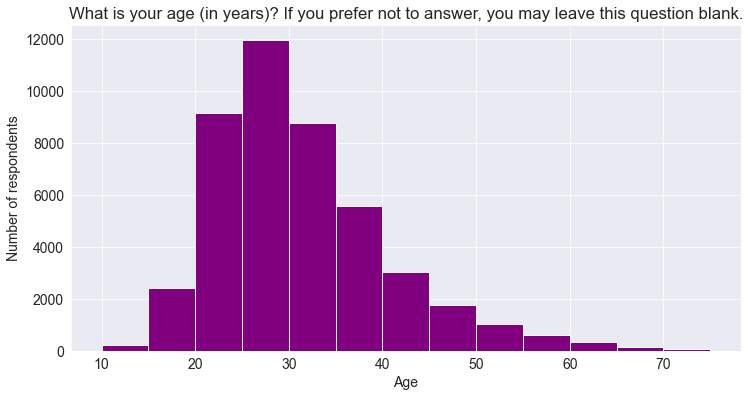

In [37]:
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(df_survey.Age, bins=np.arange(10,80,5), color='purple');

In [84]:
df_age = df_survey.copy()

In [85]:
np.where(df_age.Age.between(10,15), "<15", "outros")

array(['outros', 'outros', 'outros', ..., 'outros', 'outros', 'outros'],
      dtype='<U6')

In [87]:
df_age.Age

0         NaN
1         NaN
2         NaN
3        25.0
4        31.0
         ... 
64456     NaN
64457     NaN
64458     NaN
64459     NaN
64460     NaN
Name: Age, Length: 64306, dtype: float64

In [86]:
pd.cut(df_age.Age, 7)

0                     NaN
1                     NaN
2                     NaN
3        (22.714, 35.429]
4        (22.714, 35.429]
               ...       
64456                 NaN
64457                 NaN
64458                 NaN
64459                 NaN
64460                 NaN
Name: Age, Length: 64306, dtype: category
Categories (7, interval[float64]): [(9.911, 22.714] < (22.714, 35.429] < (35.429, 48.143] < (48.143, 60.857] < (60.857, 73.571] < (73.571, 86.286] < (86.286, 99.0]]

In [88]:
pd.cut(df_age.Age, 7).unique()

[NaN, (22.714, 35.429], (35.429, 48.143], (9.911, 22.714], (48.143, 60.857], (60.857, 73.571], (73.571, 86.286], (86.286, 99.0]]
Categories (7, interval[float64]): [(9.911, 22.714] < (22.714, 35.429] < (35.429, 48.143] < (48.143, 60.857] < (60.857, 73.571] < (73.571, 86.286] < (86.286, 99.0]]

In [90]:
pd.cut(df_age.Age, [0,10,15,20,25,30.5, 300])

0                  NaN
1                  NaN
2                  NaN
3         (20.0, 25.0]
4        (30.5, 300.0]
             ...      
64456              NaN
64457              NaN
64458              NaN
64459              NaN
64460              NaN
Name: Age, Length: 64306, dtype: category
Categories (6, interval[float64]): [(0.0, 10.0] < (10.0, 15.0] < (15.0, 20.0] < (20.0, 25.0] < (25.0, 30.5] < (30.5, 300.0]]

In [95]:
df_age["grouped_age"] = pd.cut(df_age.Age, range(0, 106, 5))
df_age.grouped_age.value_counts()

(25, 30]      11669
(20, 25]      10601
(30, 35]       7819
(35, 40]       5020
(15, 20]       3384
(40, 45]       2592
(45, 50]       1578
(50, 55]        931
(55, 60]        525
(10, 15]        434
(60, 65]        281
(65, 70]        126
(70, 75]         56
(75, 80]         23
(95, 100]        10
(80, 85]          8
(5, 10]           4
(85, 90]          4
(90, 95]          3
(0, 5]            0
(100, 105]        0
Name: grouped_age, dtype: int64

In [94]:
[num + 0.1 for num in range(0, 14, 3)]

[0.1, 3.1, 6.1, 9.1, 12.1]

### Empregabilidade

In [96]:
schema.Employment

'Which of the following best describes your current employment status?'

In [97]:
df_survey.Employment.unique()

array(['Independent contractor, freelancer, or self-employed',
       'Employed full-time', nan, 'Student',
       'Not employed, but looking for work', 'Employed part-time',
       'Retired', 'Not employed, and not looking for work'], dtype=object)

In [99]:
df_survey.Employment.value_counts(normalize = True)*100

Employed full-time                                      70.918383
Student                                                 12.199893
Independent contractor, freelancer, or self-employed     8.863615
Not employed, but looking for work                       3.665962
Employed part-time                                       3.470360
Not employed, and not looking for work                   0.501625
Retired                                                  0.380162
Name: Employment, dtype: float64

In [100]:
curious = ["Student", "Not employed, and not looking for work"]
professional = ["Employed full-time", "Independent contractor, freelancer, or self-employed", "Employed part-time"]


In [107]:
df_survey.loc[df_survey.Employment.isin(curious), "EmploymentType"] = "curious"
print(df_survey.EmploymentType.unique())

['professional' 'unemployed' 'curious' nan]


In [108]:
df_survey.loc[df_survey.Employment.isin(professional), "EmploymentType"] = "professional"
print(df_survey.EmploymentType.unique())

['professional' 'unemployed' 'curious' nan]


In [109]:
df_survey.loc[df_survey.EmploymentType.isna(), "EmploymentType"] = "unemployed"
print(df_survey.EmploymentType.unique())

['professional' 'unemployed' 'curious']


In [ ]:
df_survey.loc[df_survey.Employment == "Retired", "EmploymentType"] = "Retired"
print(df_survey.EmploymentType.unique())

In [110]:
df_survey

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,ConvertedComp,EmploymentType
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,...,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important,NaN,professional
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,...,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important,NaN,professional
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unemployed
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,...,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,NaN,unemployed
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,...,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important,NaN,professional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16.0,10.0,NaN,NaN,...,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important,NaN,professional
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,...,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,professional
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unemployed
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,...,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,professional


### Identidade de gênero

**Exercício:**
- Qual proporção de programadores por gênero?
- Como isso está associado a educação e salário?

Link útil: [Divisão de Gênero em Ciência de Dados](https://medium.com/datadriveninvestor/exploratory-data-analysis-eda-understanding-the-gender-divide-in-data-science-roles-9faa5da44f5b)

### Grau de escolaridade

**Exercício:**
- Qual a distribuição de escolaridade na área?
- Quais são os top cursos presentes nos quais as pessoas se graduam para trabalhar na área?

### Profissão

In [111]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [ ]:
# Quebra de colunas

In [113]:
df_survey.DevType.unique()

array(['Developer, desktop or enterprise applications;Developer, full-stack',
       'Developer, full-stack;Developer, mobile', nan, ...,
       'Data scientist or machine learning specialist;Database administrator;Developer, back-end;Developer, front-end;System administrator',
       'Academic researcher;Data or business analyst;Data scientist or machine learning specialist;Database administrator;Designer;Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, front-end;Developer, full-stack;Developer, game or graphics;Developer, mobile;Developer, QA or test;DevOps specialist;Senior executive/VP;System administrator',
       'Data or business analyst;Developer, mobile;Senior executive/VP;System administrator'],
      dtype=object)

In [114]:
df_survey.DevType

0        Developer, desktop or enterprise applications;...
1                  Developer, full-stack;Developer, mobile
2                                                      NaN
3                                                      NaN
4                                                      NaN
                               ...                        
64456                                  Senior executive/VP
64457                                                  NaN
64458                                                  NaN
64459                                                  NaN
64460                                                  NaN
Name: DevType, Length: 64306, dtype: object

In [119]:
from pandas.core.common import flatten

In [123]:
df_survey.DevType[df_survey.DevType.notna()].str.split(";")

0        [Developer, desktop or enterprise applications...
1               [Developer, full-stack, Developer, mobile]
5        [Designer, Developer, front-end, Developer, mo...
6        [Developer, back-end, Developer, front-end, De...
7        [Developer, back-end, Developer, desktop or en...
                               ...                        
64448    [Developer, back-end, Developer, desktop or en...
64449                                  [Developer, mobile]
64451      [Data scientist or machine learning specialist]
64453    [Data or business analyst, Developer, mobile, ...
64456                                [Senior executive/VP]
Name: DevType, Length: 48983, dtype: object

In [126]:
#set pega um conjunto unico de observações
jobs = list(set(flatten(df_survey.DevType[df_survey.DevType.notna()].str.split(";"))))
jobs

['Developer, game or graphics',
 'Scientist',
 'Marketing or sales professional',
 'Developer, embedded applications or devices',
 'Educator',
 'Senior executive/VP',
 'Engineering manager',
 'Data or business analyst',
 'Engineer, site reliability',
 'DevOps specialist',
 'Designer',
 'Engineer, data',
 'Database administrator',
 'Developer, desktop or enterprise applications',
 'Developer, QA or test',
 'Developer, full-stack',
 'Academic researcher',
 'Developer, front-end',
 'Data scientist or machine learning specialist',
 'Product manager',
 'Developer, mobile',
 'System administrator',
 'Developer, back-end']

In [132]:
[(idx, valor) for (idx, valor) in enumerate(jobs)]

[(0, 'Developer, game or graphics'),
 (1, 'Scientist'),
 (2, 'Marketing or sales professional'),
 (3, 'Developer, embedded applications or devices'),
 (4, 'Educator'),
 (5, 'Senior executive/VP'),
 (6, 'Engineering manager'),
 (7, 'Data or business analyst'),
 (8, 'Engineer, site reliability'),
 (9, 'DevOps specialist'),
 (10, 'Designer'),
 (11, 'Engineer, data'),
 (12, 'Database administrator'),
 (13, 'Developer, desktop or enterprise applications'),
 (14, 'Developer, QA or test'),
 (15, 'Developer, full-stack'),
 (16, 'Academic researcher'),
 (17, 'Developer, front-end'),
 (18, 'Data scientist or machine learning specialist'),
 (19, 'Product manager'),
 (20, 'Developer, mobile'),
 (21, 'System administrator'),
 (22, 'Developer, back-end')]

In [131]:
df_survey[df_survey.DevType.str.contains(jobs[0], na = False) == True].loc[7, "DevType"]

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,ConvertedComp,EmploymentType
7,United States,36.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,12.0,17.0,13.0,Python;SQL,...,Play games;Call a coworker or friend;Visit Sta...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",39.0,Slightly dissatisfied,Remote work options;Opportunities for professi...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,116000.0,professional
45,France,24.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,14.0,6.0,4.0,Bash/Shell/PowerShell;C#;C++,...,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",35.0,Slightly satisfied,Industry that I’d be working in;Specific depar...,Sometimes: 1-2 days per month but less than we...,Fairly important,37834.0,professional
73,United Kingdom,34.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,8.0,17.0,11.0,Assembly;Bash/Shell/PowerShell;C;C#;C++;Go;HTM...,...,Call a coworker or friend;Visit Stack Overflow...,"Independent contractor, freelancer, or self-em...","Database administrator;Developer, back-end;Dev...",35.0,Neither satisfied nor dissatisfied,Diversity of the company or organization;Flex ...,Never,Fairly important,124092.0,professional
91,Greece,42.0,Man,"Other doctoral degree (Ph.D., Ed.D., etc.)",NaN,Yes,12.0,24.0,15.0,Assembly;Bash/Shell/PowerShell;C;C++;HTML/CSS;...,...,Visit Stack Overflow;Watch help / tutorial videos,Employed full-time,Academic researcher;Database administrator;Dev...,25.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Not at all important/not necessary,21620.0,professional
162,United States,18.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,14.0,5.0,NaN,Bash/Shell/PowerShell;C;C#;HTML/CSS;Java;JavaS...,...,Play games;Visit Stack Overflow;Go for a walk ...,Employed part-time,"Developer, back-end;Developer, full-stack;Deve...",NaN,NaN,Industry that I’d be working in;Flex time or a...,NaN,NaN,NaN,professional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64343,Afghanistan,NaN,NaN,I never completed any formal education,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;Go;HTML/CSS;Jav...,...,Meditate;Play games;Call a coworker or friend;...,"Independent contractor, freelancer, or self-em...",Academic researcher;Data or business analyst;D...,NaN,NaN,NaN,NaN,NaN,NaN,professional
64344,Japan,NaN,NaN,I never completed any formal education,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,...,Meditate;Play games;Call a coworker or friend;...,Employed full-time,Academic researcher;Data or business analyst;D...,NaN,NaN,NaN,NaN,NaN,NaN,professional
64392,Bangladesh,36.0,NaN,NaN,NaN,Yes,35.0,NaN,12.0,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,...,Meditate;Play games;Call a coworker or friend;...,Employed full-time,Academic researcher;Data or business analyst;D...,NaN,NaN,NaN,NaN,Critically important,NaN,professional
64401,Poland,NaN,Woman,I never completed any formal education,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,...,Meditate;Play games;Call a coworker or friend;...,Employed full-time,Academic researcher;Data or business analyst;D...,NaN,NaN,NaN,NaN,NaN,NaN,professional


In [134]:
{job: df_survey.DevType.str.contains(job, na = False).values for job in jobs}

{'Developer, game or graphics': array([False, False, False, ..., False, False, False]),
 'Scientist': array([False, False, False, ..., False, False, False]),
 'Marketing or sales professional': array([False, False, False, ..., False, False, False]),
 'Developer, embedded applications or devices': array([False, False, False, ..., False, False, False]),
 'Educator': array([False, False, False, ..., False, False, False]),
 'Senior executive/VP': array([False, False, False, ..., False, False, False]),
 'Engineering manager': array([False, False, False, ..., False, False, False]),
 'Data or business analyst': array([False, False, False, ..., False, False, False]),
 'Engineer, site reliability': array([False, False, False, ..., False, False, False]),
 'DevOps specialist': array([False, False, False, ..., False, False, False]),
 'Designer': array([False, False, False, ..., False, False, False]),
 'Engineer, data': array([False, False, False, ..., False, False, False]),
 'Database administrato

In [139]:
df_jobs = pd.DataFrame({job: df_survey.DevType.str.contains(job, na = False).values for job in jobs})
df_jobs

,"Developer, game or graphics",Scientist,Marketing or sales professional,"Developer, embedded applications or devices",Educator,Senior executive/VP,Engineering manager,Data or business analyst,"Engineer, site reliability",DevOps specialist,...,"Developer, desktop or enterprise applications","Developer, QA or test","Developer, full-stack",Academic researcher,"Developer, front-end",Data scientist or machine learning specialist,Product manager,"Developer, mobile",System administrator,"Developer, back-end"
0,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64301,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64302,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64303,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64304,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [140]:
df_jobs.sum().sort_values(ascending = False)

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

In [ ]:
# Subset mulheres %

In [148]:
is_woman = df_survey.Gender == "Woman"
is_woman

0        False
1        False
2        False
3        False
4        False
         ...  
64456    False
64457    False
64458    False
64459    False
64460    False
Name: Gender, Length: 64306, dtype: bool

In [143]:
df_survey.Gender.unique()

array(['Man', nan, 'Woman',
       'Non-binary, genderqueer, or gender non-conforming'], dtype=object)

In [ ]:
#df_jobs
#linha 1: is_woman == True? -> Se Sim Pega Linha
#linha 2: is_woman == True? -> Se Sim Pega Linha


In [153]:
df_jobs[is_woman.values].sum().sort_values(ascending = False)

Developer, full-stack                            1476
Developer, back-end                              1329
Developer, front-end                             1196
Developer, mobile                                 458
Developer, desktop or enterprise applications     433
Designer                                          333
Data scientist or machine learning specialist     306
Data or business analyst                          282
Developer, QA or test                             251
Database administrator                            222
Academic researcher                               213
Engineer, data                                    186
Educator                                          178
DevOps specialist                                 154
Developer, embedded applications or devices       153
System administrator                              137
Scientist                                         120
Product manager                                   113
Developer, game or graphics 

In [151]:
nova_serie = 100*df_jobs[is_woman.values].sum().sort_values(ascending = False)/df_jobs.sum()
nova_serie.sort_values(ascending = False)

Marketing or sales professional                  10.240000
Data scientist or machine learning specialist     7.768469
Data or business analyst                          7.103275
Developer, front-end                              6.597529
Developer, QA or test                             6.447470
Designer                                          6.328392
Educator                                          6.148532
Academic researcher                               6.082239
Scientist                                         5.825243
Developer, full-stack                             5.483931
Engineer, data                                    5.027027
Developer, back-end                               4.922952
Developer, mobile                                 4.869232
Product manager                                   4.573047
Database administrator                            3.923648
Developer, game or graphics                       3.816794
Developer, desktop or enterprise applications     3.7049

In [156]:
is_woman.values

array([False, False, False, ..., False, False, False])

In [157]:
df_jobs.values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [158]:
np.reshape(is_woman.values, (-1,1))

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [163]:
is_woman.values.T

array([False, False, False, ..., False, False, False])

In [159]:
df_jobs.values*np.reshape(is_woman.values, (-1,1))

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [168]:
matriz1 = np.reshape(np.array([1,2,3,4,5,6,7,8,9]), (3,3))
matriz1

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [171]:
matriz2 = np.reshape(np.array([1,2,3,4,5,6]), (2,3))
matriz2

array([[1, 2, 3],
       [4, 5, 6]])

In [172]:
matriz1*matriz2

ValueError: operands could not be broadcast together with shapes (3,3) (2,3) 

In [174]:
bool(2)

True

In [175]:
bool(0)

False

In [176]:
bool(-1)

True

In [182]:
df_survey.Gender.unique()

array(['Man', nan, 'Woman',
       'Non-binary, genderqueer, or gender non-conforming'], dtype=object)

In [189]:
df_survey[df_survey.Gender.str.contains("Man|Woman", na = False)].Gender.unique()

array(['Man', 'Woman'], dtype=object)

### Bônus

In [50]:
schema["ConvertedComp"]

'Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks.'

In [177]:
df_survey.ConvertedComp.describe()

count    3.445300e+04
mean     1.038089e+05
std      2.270709e+05
min      0.000000e+00
25%      2.464800e+04
50%      5.404900e+04
75%      9.500000e+04
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [178]:
df_survey_bonus = df_survey.copy()
df_survey_bonus.drop(df_survey_bonus[~df_survey_bonus.ConvertedComp.between(0,250_000)].index, inplace = True)
df_survey_bonus.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs,ConvertedComp
count,28785.000000,32418.000000,32413.000000,31130.000000,31637.000000,32655.000000
mean,32.085274,15.205380,14.189492,8.764664,39.864706,61250.807135
std,8.447241,4.686648,9.254059,7.532895,10.089275,48815.118342
min,10.000000,5.000000,1.000000,1.000000,1.000000,0.000000
25%,26.000000,12.000000,7.000000,3.000000,40.000000,23088.000000
50%,30.000000,15.000000,12.000000,6.000000,40.000000,50411.000000
75%,36.000000,18.000000,20.000000,12.000000,42.000000,85908.000000
max,99.000000,52.000000,50.000000,50.000000,140.000000,250000.000000


In [179]:
gender_mean = df_survey_bonus.groupby(by="Gender").ConvertedComp.mean()
gender_std = df_survey_bonus.groupby(by="Gender").ConvertedComp.std()
gender_count = df_survey_bonus.groupby(by="Gender").ConvertedComp.count()
gender_mean

Gender
Man                                                  61479.880862
Non-binary, genderqueer, or gender non-conforming    73203.736842
Woman                                                62395.310345
Name: ConvertedComp, dtype: float64

In [180]:
(gender_mean.Woman - gender_mean.Man)

915.4294832050291

In [190]:
(gender_mean["Non-binary, genderqueer, or gender non-conforming"] - gender_mean.Man)

11723.85598048271

In [193]:
gender_count

Gender
Man                                                  27808
Non-binary, genderqueer, or gender non-conforming      228
Woman                                                 2175
Name: ConvertedComp, dtype: int64

In [192]:
def mu_stderror(std1, std2, n1, n2):
    return np.sqrt((std1**2/n1) + (std2**2/n2))

def mu_interval(mu, stderror):
    print(f"({mu-1.96*stderror} ; {mu+1.96*stderror})")

def z_test(mu, stderror):
    return mu/stderror

#mu = gender_mean.Woman-gender_mean.Man
mu = gender_mean["Non-binary, genderqueer, or gender non-conforming"]-gender_mean.Man

#stderror = mu_stderror(gender_std.Woman, gender_std.Man, gender_count.Woman, gender_count.Man)
stderror = mu_stderror(gender_std["Non-binary, genderqueer, or gender non-conforming"], gender_std.Man, gender_count["Non-binary, genderqueer, or gender non-conforming"], gender_count.Man)

mu_interval(mu, stderror)
z_test(mu, stderror)

(5084.938892303845 ; 18362.773068661572)


3.4612207708786826

## Pipe

In [194]:
teste = df_survey_raw[selected_columns].copy()
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [195]:
def to_numeric(df, columns):
    data = df.copy()
    data[columns] = data[columns].apply(pd.to_numeric, errors='coerce')
    return data

def drop_outliers(df, column, left=None, right=None):
    data = df.copy()
    min_value = df[column].min()
    max_value = df[column].max()
    if left is None and right is None:
        pass
    elif left is None:
        data.drop(data[data[column] > right].index, inplace = True)
    elif right is None:
        data.drop(data[data[column] < left].index, inplace = True)
    else:
        data.drop(data[~data[column].between(left, right)].index, inplace = True)
    return data

def multiselection_to_na(df, column, sep = ";", na = False):
    data = df.copy()
    data.where(~(data[column].str.contains(sep, na = na)), np.nan, inplace=True)
    return data

def create_bin(df, column, step):
    data = df.copy()
    new_column = "grouped_" + column.lower()
    min_value = int(data[column].min() - 1)
    max_value = int(data[column].max() + step + 1)
    bins = range(min_value, max_value, step)                     
    data[new_column] = pd.cut(data[column], bins)
    return data

In [196]:
cols = ["Age1stCode", "YearsCode", "YearsCodePro"] 

In [204]:
(teste
    .pipe(to_numeric, cols)
    .pipe(drop_outliers, "Age", 10, 100)
    .pipe(drop_outliers, "WorkWeekHrs", right = 140)
    .pipe(multiselection_to_na, "Gender").info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45319 entries, 3 to 64441
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 45068 non-null  object 
 1   Age                     45068 non-null  float64
 2   Gender                  44465 non-null  object 
 3   EdLevel                 44092 non-null  object 
 4   UndergradMajor          39366 non-null  object 
 5   Hobbyist                45068 non-null  object 
 6   Age1stCode              44688 non-null  float64
 7   YearsCode               44301 non-null  float64
 8   YearsCodePro            34982 non-null  float64
 9   LanguageWorkedWith      44654 non-null  object 
 10  LanguageDesireNextYear  42599 non-null  object 
 11  NEWLearn                43430 non-null  object 
 12  NEWStuck                44539 non-null  object 
 13  Employment              44947 non-null  object 
 14  DevType                 38811 non-null

In [205]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [207]:
#numerico
#outliers age
#outliers workHours
#gender contains ;
#bin
#count

(teste
    .pipe(to_numeric, cols)
    .pipe(drop_outliers, "Age", 10, 100)
    .pipe(drop_outliers, "WorkWeekHrs", right = 140)
    .pipe(multiselection_to_na, "Gender")
    .pipe(create_bin, "Age", 5)
    .groupby("grouped_age")
    .size())

grouped_age
(9, 14]        207
(14, 19]      2420
(19, 24]      9134
(24, 29]     11940
(29, 34]      8738
(34, 39]      5582
(39, 44]      3032
(44, 49]      1755
(49, 54]      1039
(54, 59]       622
(59, 64]       333
(64, 69]       143
(69, 74]        71
(74, 79]        24
(79, 84]         9
(84, 89]         6
(89, 94]         2
(94, 99]        11
(99, 104]        0
dtype: int64

## Questões Adicionais

#### Quais são as linguagens mais populares em 2020?
Use a coluna `LanguageWorkedWith`.

**Exercícios**:

- Quais as linguagens mais utilizadas pelos estudantes?
- Quais as linguagens mais utilizadas pelos ciêntistas de dados?
- Quais as linguagens mais utilizadas pelos desenvolvedores com mais de 35 anos de idade? e de profissão? 
- Quais as linguagens mais utilizadas no Brasil?

#### Qual a linguagem as pessoas acham mais interessantes para se aprender em 2021?
Use a coluna `LanguageDesireNextYear`

#### Quais países tabalham mais horas por semana? Considere apenas países com mais de 250 respondentes.

**Exercícios:**

- Quais empregos trabalham mais horas extras em média? Como isso se compara entre freelancers x trabalho formal full-time?

# Tente reproduzir outras dados de acordo com a pesquisa original de 2021